# Adaboost
- AdaBoost, short for Adaptive Boosting, is a classification algorithm,is from the family of boosting algorithms. Combines the outputs of many classifiers into an ensemble, but there are some differences. 
- Each classifier in the ensemble is powerful but prone to overfitting. As Bagging or RF aggregate more and more classifiers, they reduce overfitting.

#### Details
- With AdaBoost, each Classifier usually has performance slightly better than random. This is referred to as a weak learner or weak classifier.
- AdaBoost combines these classifiers to get a strong classifier. Unlike Bagging and Random Forest, in AdaBoost, adding more learners can cause overfitting.
- As a result, AdaBoost requires Hyperparameter tuning, taking more time to train. One advantage of AdaBoost is that each classifier is smaller, so predictions are faster.

#### Mathematics
In AdaBoost, the strong classifier $H(x)$ is a linear combination of $T$ weak classifiers $h_t(x)$ and $\alpha_t$ as shown in (1). Although each classifier $h_t(x)$ appears independent, the $\alpha_t$ contains information about the error of classifiers from $h_1(x),.., h_{t-1}(x)$. As we add more classifiers, the training accuracy gets larger. What’s not so apparent in (1) is that during the training process, the values of that training sample are modified for $h_t(x)$.

# Import libraries

In [21]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier # for classification
from sklearn.ensemble import AdaBoostRegressor # for regression
from sklearn import preprocessing


## ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Calculate the accuracy of the training and testing data based on any model
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return {"Testing Accuracy": metrics.accuracy_score(
        y_test,
        model.predict(X_test)
    ),
    "Train Accuracy": metrics.accuracy_score(
        y_train,
        model.predict(X_train)
    )}

- Calculates the average accuracy of different learning rates on training and test data

In [3]:
def get_accuracy_bagging(X, y, title, times = 21, xlabel = "Number Estimators", Learning_rate_ = [0.2, 0.4, 0.6, 1]):
    # Create the array of lines
    lines_array=['solid','--', '-.', ':']

    # Create the list of estimators
    N_estimators = [n for n in range(1, 100)]

    # Number of times
    times=20

    # Initialize NumPy arrays train_acc and test_acc with zeros,
    # which will later be used to store accuracy results for training and testing.
    train_acc=np.zeros((
        times,
        len(Learning_rate_),
        len(N_estimators))) # shape defined by tuple times, learning rate (len), len(estimators)
    
    test_acc=np.zeros((
        times,
        len(Learning_rate_),
        len(N_estimators)))
    
    #Iterate through different number of Learning rate  and average out the results  
    for n in tqdm(range(times)):
        # create a train and test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # Iterate each estimator
        for n_estimators in N_estimators:
            # This is a for loop that iterates over the list Learning_rate_, which contains different values of learning rates.
            for j,lr in enumerate(Learning_rate_):
                # Pick the model, pass the parameters
                model = AdaBoostClassifier(n_estimators=n_estimators+1,
                                           random_state=0,
                                           learning_rate=lr)


                # fit the data to the model
                model.fit(X_train,y_train)

                # Get the accuracy of the model
                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)

                # Training set accuracy
                train_acc[n,j,n_estimators-1]=Accuracy['Train Accuracy']

                # Testing set accuracy
                test_acc[n,j,n_estimators-1]=Accuracy['Testing Accuracy']

    # Create the first figure
    fig, ax1 = plt.subplots()

    # Get the average accuracy of test set
    mean_test=test_acc.mean(axis=0)

    # Get the average accuracy of training set
    mean_train=train_acc.mean(axis=0)
    
    # Used by Matplotlib to create a second y-axis (on the right side of the plot) that shares the same x-axis as ax1.
    ax2 = ax1.twinx()

    # This line iterates over both Learning_rate_ and lines_array simultaneously, 
    # giving you the index j, the learning rate lr, and the corresponding line object line for plotting.
    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 
        # in the first axis is the mean of training
        ax1.plot(mean_train[j,:],
                 linestyle = line,
                 color='blue',
                 label="Learning rate "+str(lr))
        
        # in the second axis is the mean of test 
        ax2.plot(mean_test[j,:],
                 linestyle = line,
                   color='red',
                   label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.set_xlabel('No of estimators')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    plt.show()

# Project scenario
#### Scenario: "SaveNet – AI-Powered Churn Prediction to Retain Telecom Customers"

- In an era of rising customer acquisition costs and fierce competition in the telecom industry, SaveNet, a fictional telecommunications company, is facing a critical challenge: retaining existing customers before they churn.
- With thousands of users leaving monthly, often without warning, the company launches a data-driven initiative to understand who is likely to leave and why.

- Using historical customer data, SaveNet’s Data Science team builds a predictive machine learning model to forecast churn with high precision. 
- The dataset captures diverse signals—service usage patterns, contract types, billing behaviors, and demographics—to surface actionable insights.

#### For example:
- Customers with month-to-month contracts and high monthly charges show higher churn risk.
- Those without tech support or online security services tend to leave more frequently.
- Customers with paperless billing and automatic payment methods are more likely to stay.

# Results
#### With this model, SaveNet segments customers into risk tiers, allowing the marketing and customer success teams to:
- Trigger real-time retention offers for at-risk customers.
- Promote value-added services (like device protection or streaming bundles) to boost engagement.
- Personalize outreach strategies based on demographic preferences and contract history.
- In just three months, SaveNet reports a 12% drop in churn rate, saving millions in potential revenue loss while enhancing customer satisfaction.

In [4]:
churn_df = pd.read_csv("ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


- select some features

In [5]:
# Select some features that where also selected by IBM
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
# Make sure the churn is an int type
churn_df['churn'] = churn_df['churn'].astype('int')
# Check the dataset
churn_df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


- Select variables at Random
1. Like Bagging, RF uses an independent bootstrap sample from the training data. 
2. In addition, we select $m$ variables at random out of all $M$ possible

In [6]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
X.head(5)

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [7]:
# define the y, label which I need to find
y = churn_df['churn']
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [8]:
# Implement the train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (150, 7) (150,)
Test set (50, 7) (50,)


- Implement the Ada Boost Algorithm
1. The parameter <code>n_estimatorsint</code> is the maximum number of classifiers (default=50) at which boosting is stopped.
2. If the results are perfect, the training procedure is stopped early.


In [9]:
n_estimators=10
random_state=42

In [10]:
# AdaBoostClassifier Object
model = AdaBoostClassifier(n_estimators=n_estimators
                           ,random_state=random_state)

- If the outputs were y-1 and 1, the form of the classifier would be:

- $H(x) =  ext{sign}(  \alpha_1 h_1(x)+ \alpha_2 h_2(x)+ \alpha_3 h_3(x)+ \alpha_4 h_4(x)+ \alpha_5 h_5(x) )$

- We can fit the object finding all the $\alpha_t$ $h_t(x)$ and then make a prediction:

In [11]:
# Pass the data to the model
model.fit(X_train, y_train)

# Start making predictions based on the test set
y_pred = model.predict(X_test) # data the model has not seen yet
y_pred # show the predictions

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0])

- Find the training and testing accuracy:

In [12]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'Testing Accuracy': 0.74, 'Train Accuracy': 0.7866666666666666}


- output a list of the weak classifiers: $h_1(x), h_2(x), h_3(x),h_4(x)$ and $h_5(x)$

In [13]:
model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1608637542),
 DecisionTreeClassifier(max_depth=1, random_state=1273642419),
 DecisionTreeClassifier(max_depth=1, random_state=1935803228),
 DecisionTreeClassifier(max_depth=1, random_state=787846414),
 DecisionTreeClassifier(max_depth=1, random_state=996406378),
 DecisionTreeClassifier(max_depth=1, random_state=1201263687),
 DecisionTreeClassifier(max_depth=1, random_state=423734972),
 DecisionTreeClassifier(max_depth=1, random_state=415968276),
 DecisionTreeClassifier(max_depth=1, random_state=670094950),
 DecisionTreeClassifier(max_depth=1, random_state=1914837113)]

- Weak classifiers do not perform well

In [14]:
[ ("Weak classifier {},  we get ".format(i+1),
   get_accuracy(X_train, X_test, y_train, y_test,  weak_classifiers))
     for i, weak_classifiers in enumerate(model.estimators_)]

[('Weak classifier 1,  we get ',
  {'Testing Accuracy': 0.78, 'Train Accuracy': 0.6866666666666666}),
 ('Weak classifier 2,  we get ',
  {'Testing Accuracy': 0.58, 'Train Accuracy': 0.6733333333333333}),
 ('Weak classifier 3,  we get ',
  {'Testing Accuracy': 0.62, 'Train Accuracy': 0.66}),
 ('Weak classifier 4,  we get ',
  {'Testing Accuracy': 0.8, 'Train Accuracy': 0.7466666666666667}),
 ('Weak classifier 5,  we get ',
  {'Testing Accuracy': 0.4, 'Train Accuracy': 0.44666666666666666}),
 ('Weak classifier 6,  we get ',
  {'Testing Accuracy': 0.32, 'Train Accuracy': 0.41333333333333333}),
 ('Weak classifier 7,  we get ',
  {'Testing Accuracy': 0.78, 'Train Accuracy': 0.6866666666666666}),
 ('Weak classifier 8,  we get ',
  {'Testing Accuracy': 0.46, 'Train Accuracy': 0.56}),
 ('Weak classifier 9,  we get ',
  {'Testing Accuracy': 0.6, 'Train Accuracy': 0.6333333333333333}),
 ('Weak classifier 10,  we get ',
  {'Testing Accuracy': 0.4, 'Train Accuracy': 0.44666666666666666})]

# To improve the model Test 1:
- Increase weak classifiers

In [15]:
n_estimators=200
random_state=42

In [16]:
# Create the object
model = AdaBoostClassifier(n_estimators=n_estimators,
                           random_state=random_state)
# Pass to the model the data
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [17]:
# Obtain the training and testing accuracy
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'Testing Accuracy': 0.76, 'Train Accuracy': 0.9}


- Adding more weak classifiers causes overfitting.
- Verification by plotting the training and test accuracy over the number of classifiers:

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [03:40<00:00, 11.04s/it]


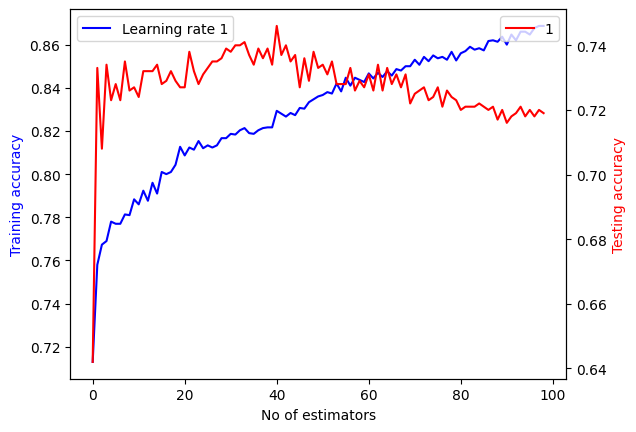

In [ ]:
get_accuracy_bagging(X,y,title="Training and Test Accuracy vs Adding more Weak Classifiers",
                     Learning_rate_=[1],
                     times=21,
                     xlabel='Number Estimators')

- Another important parameter which we can set is the <code>algorithm</code> which takes values such as SAMME and SAMME.R
- The default is SAMME.R
- Typically converges faster than <code>SAMME</code>, achieving a lower test error with fewer boosting iterations
- One issue is that <code>SAMME.R</code> can't be used all the time

### Next step
- Change base Classifier to generate the probability of belonging to each class

- Ada boost is usually performed with decision trees, but I can use other base classifiers. If the classifier, is too strong, it will cause overfitting. 
- I will use SVM as my base Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
# change the base estimator
base_estimator=SVC(kernel='rbf',gamma=1)

In [36]:
# fit the data to the base estimator
base_estimator.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test, base_estimator))

{'Testing Accuracy': 0.43333333333333335, 'Train Accuracy': 1.0}


- Note: The SVM cannot give the probability of beloning into each class 

- Try the algorithm SAMME

In [ ]:
# Initiate the algorithm SAMME
algorithm='SAMME'

In [44]:
# Initialize the adaboost classifier model
model = AdaBoostClassifier(n_estimators=5,learning_rate=1,algorithm='SAMME' )

In [45]:
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'Testing Accuracy': 0.7833333333333333, 'Train Accuracy': 0.8142857142857143}


# My solution testing the algorithm -------------------------------------------------------------------------------------

# Practical Implementation
- Role: Medical Researcher
- Scenario: I have collected data about a set of patients all whom suffered from the same illness. During the treatment period, each patient responded to one of the 5 medications, Drug A, Drug b, Drug C, Drug d, Drug x and y.
- Which drug is going to be the best for the future patient with the same illness. 
- Features: Age, Sex, Cholesterol, Blood pressure
- Label: target, is the drug each patient has responded. 


In [19]:
df = pd.read_csv("drug200.csv")
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- Create the X and Y

In [20]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

- Use label encoder to turn Categorical Features into numerical

In [22]:
# Enable and initialize the Label Encoder
label_sex = preprocessing.LabelEncoder()

# fit the parameters of the sex into the encoder
label_sex.fit(['F', 'M'])

# Encoding the second column of X using the label encoder
X[:,1] = label_sex.transform(X[:,1]) 

# Enable and initialize the Label Encoder
label_BP = preprocessing.LabelEncoder()

# fit the parameter of the BP into the encoder
label_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])

# Encode the third column of X using the label encoder
X[:,2] = label_BP.transform(X[:,2])

# Enable and initialize the Label Encoder
label_Chol = preprocessing.LabelEncoder()

# fit the parameter of the Cholesterol into the encoder
label_Chol.fit([ 'NORMAL', 'HIGH'])

# Encode the fourth parameter using the label encoder
X[:,3] = label_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

- Split the data into a 70/30 split

In [23]:
# Initialize the train and test split with size 70/20 and also the random state 42 in order to be able to redu the experiment with the same results
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140, 5) (140,)
Test set: (60, 5) (60,)


- Initialize the Gridsearch for Exhaustive research over specific parameter values

# Samme : Original AdaBoost algorithm,
- extended to multi-class classification
- Used to predict class labels, from the base estimators
- Slower to converge compared to SAMME.R.

# Samme.R
- Used to predict class probabilities instead of labels
- Typically performs better and faster.
- Default in AdaBoostClassifier.  

In [24]:
# Algorithm 
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}      

- Create the Adaboost Classifier Object, called model

In [25]:
model = AdaBoostClassifier()
model.get_params().keys()

dict_keys(['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

- Creating a GridSearchCV object called search with the estimator, set to the model and param_grid
- Also add the scoring set to accuracy
- CV set to 3 and Fit the GridSearchCV object to my X_train and y_train, data

In [26]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Create a Grid Search CV object
search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)
search.fit(X_train, y_train)

,estimator,AdaBoostClassifier()
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.1, 0.2, ...], 'n_estimators': [1, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


- The accuracy of the model is 86%

In [31]:
search.best_score_

np.float64(0.8641689793401172)

- The best parameter values

In [32]:
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.6000000000000001, 'n_estimators': 19}

- Calculate the accuracy on the test data using the test data

In [33]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'Testing Accuracy': 0.85, 'Train Accuracy': 0.8357142857142857}
